In [177]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
# ALUNO: ALDO TEIXEIRA DA SILVA JUNIOR

In [188]:
# Abrir o dataframe
df_credit_train = pd.read_csv("creditcard_train_set.csv")
df_credit_test = pd.read_csv("creditcard_test_set.csv")


In [197]:
# Cria uma copia do df original
df = df_credit_train.copy()
df_test = df_credit_test.copy()

# Normaliza as features
features = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "Amount"]
df_features = df[features]
df_test_features = df_test[features]
norm = StandardScaler().fit_transform(df_features)
norm_test = StandardScaler().fit_transform(df_test_features)

df_feat = pd.DataFrame(norm, columns=features)
df_norm_train = pd.concat([df_feat, df['Class']], axis=1)

df_feat_test = pd.DataFrame(norm_test, columns=features)
df_norm_test =  pd.concat([df_feat_test, df_test['Class']], axis=1)

# Retira os NaN
df_norm_train = df_norm_train.dropna(axis=0)
df_norm_test = df_norm_test.dropna(axis=0)

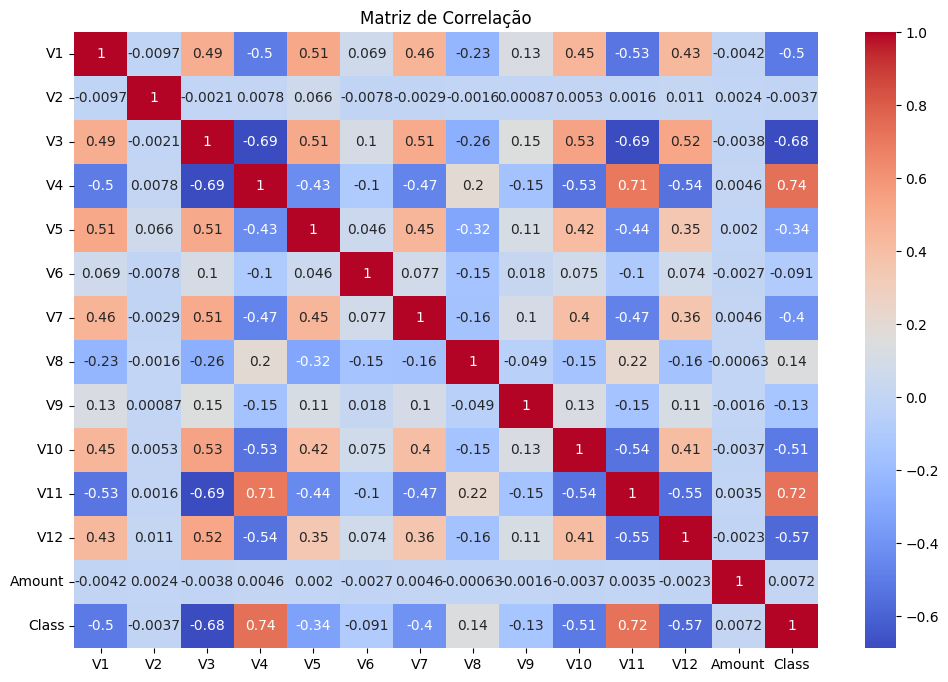

In [190]:
# Calcula a correlação dos dados
df_corr = df_norm_train.drop(['Class', 'Amount'], axis=1)
corr = df_norm_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [198]:

# É possivel notar nos dados acima que (V2, V6, V8, V9) tem correlação proxima de 0 com todas as outra variaveis
# Remove V2 do DF
# Separa as labels e features
x_train = df_norm_train.drop(['V2', 'V6', 'V8', 'V9', 'Class'], axis=1) # Features
y_train = df_norm_train['Class'] # Labels


x_test = df_norm_test.drop(['V2', 'V6', 'V8', 'V9', 'Class'], axis=1)
y_test = df_norm_test['Class']

# Sem dados faltantes no DF
df_norm_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
Amount    0
Class     0
dtype: int64

In [183]:
# Separa 20% para teste e 80% para treino
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=30, stratify=Y)

In [200]:
# Realiza o treino com 10.000 iterações
train = LogisticRegression(random_state=0, max_iter=10000).fit(x_train, y_train)
pred = train.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.9404402244281398
